In [32]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
data.shape
#predict sales by advertising media


(200, 4)

In [13]:
#data visualisations
#import seaborn
import seaborn as sns

#allow plot to appear within the notebook magic command
%matplotlib inline

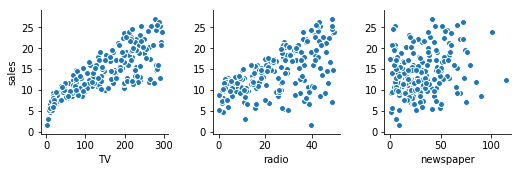

In [15]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales')

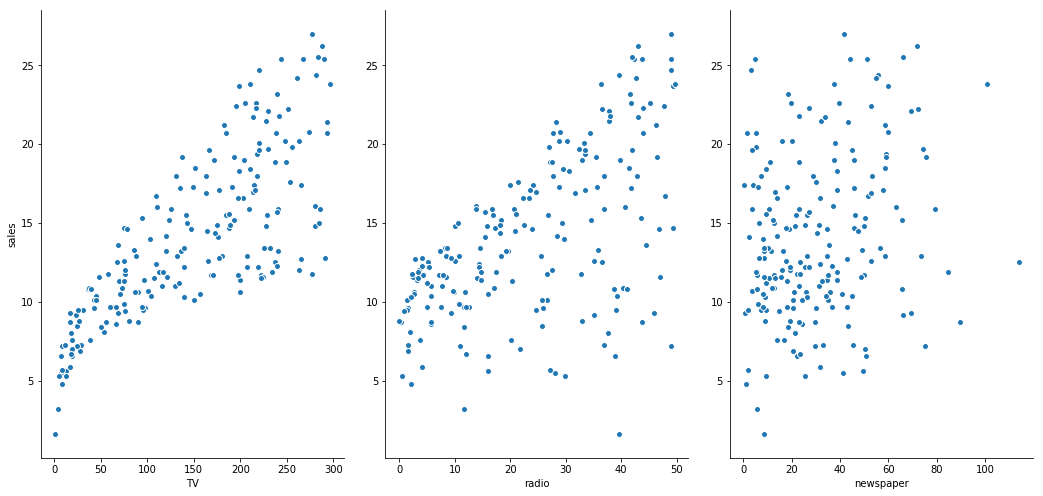

In [16]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size = 7, aspect=0.7)

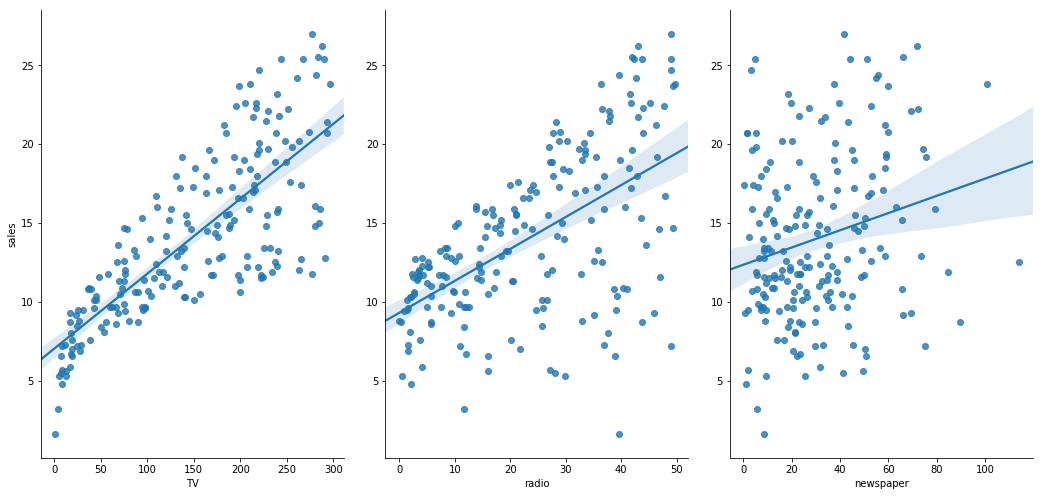

In [17]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size = 7, aspect=0.7, kind='reg')
#linear reg and 95% confint

In [21]:
data = pd.read_csv('http://bit.ly/kaggletrain')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


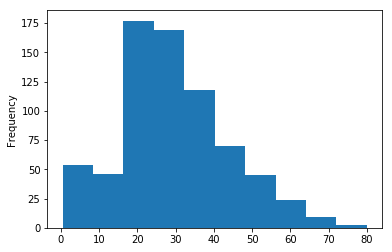

In [22]:
data.Age.plot(kind = 'hist')

In [27]:
data.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

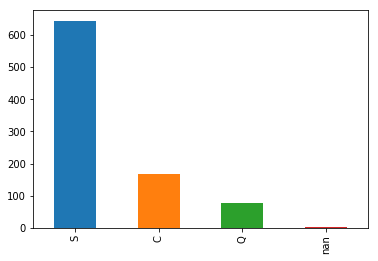

In [29]:
data.Embarked.value_counts(dropna = False).plot(kind = 'bar')

In [33]:
### This function creates a pivot table and a bar chart to show the relationship between two parameters

def pivot_chart (param1, param2):
    data_slice = data[[param1, param2, 'PassengerId']]
    slice_pivot = data_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

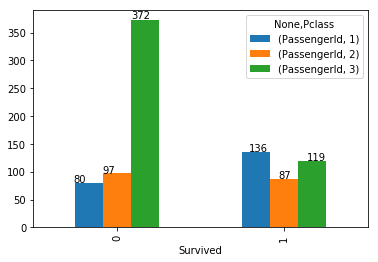

In [34]:
pivot_chart('Survived', 'Pclass')